# Loading Dependencies and Data

In [1]:

# Dependencies
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap,BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Load breast cancer dataset
cancer = load_breast_cancer()
# Load feature, and target set separately
(X_canc,y_canc) = load_breast_cancer(return_X_y=True)

# Helper Functions

In [2]:
# A function to plot labelled scatter plot
def plot_labelled_scatter(X,y,class_labels,s):
    num_labels = len(class_labels)
    x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max = X[:,1].min()-1,X[:,1].max()+1

    marker_array = ['o','^','*']
    color_array=["#FFFF00",'#00AAFF','#000000','#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0,num_labels+1,1),ncolors=num_labels)
    plt.figure(figsize=s)
    plt.scatter(X[:,0],X[:,1],s=80,c=y,cmap=cmap_bold,norm=bnorm,alpha=0.4,edgecolor='black',lw=1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)
    plt.grid(which='both',color='lightslategrey',alpha=0.3)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    h = []
    for c in range(0,num_labels):
        h.append(mpatches.Patch(color=color_array[c],label=class_labels[c]))
        plt.legend(handles=h,fontsize=15,frameon=False)


# Dimensionality Reduction

* **Dimensionality Reduction Algorithms**
    * A type of **unsupervised learning** method.
    * Categorized as a **transformation**.
    * **Purpose:** To create an approximate version of an original dataset using fewer features (dimensions).
        * *Example:* Reducing 200 features down to 10.
    * **Common Use Case:** Dataset exploration.
        * Helps visualize and understand how data samples are grouped or related.
        * Often achieved by reducing data to **two dimensions** for a scatterplot.

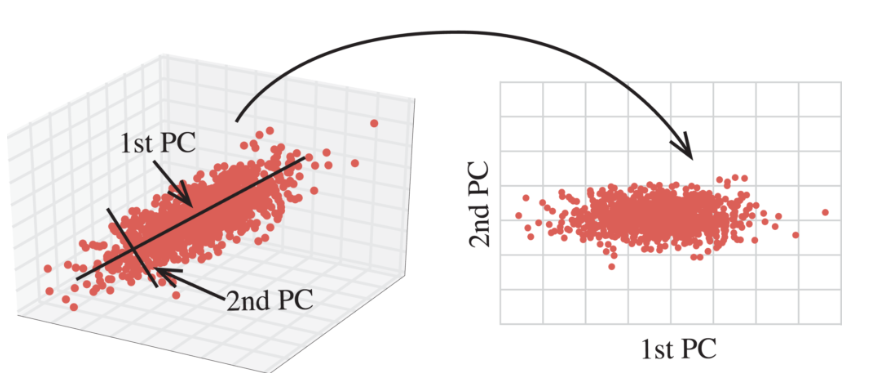

# PCA (Principal Component Analysis)

* **Principal Component Analysis (PCA)**
    * An important form of dimensionality reduction.
* **Intuitive Process:**
    1.  Takes the original "cloud" of data points.
    2.  **Finds a rotation** of the data.
    3.  The goal of this rotation is to make the new dimensions **statistically uncorrelated**.
* **Final Action:**
    * **Drops** most dimensions.
    * Keeps only the first few **most informative** dimensions.
    * These kept dimensions are the ones that **capture most of the variation** found in the original dataset.

## Using PCA to find the first two Principal Components of the Breast Cancer Dataset

In [3]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Before applying PCA, each feature should be centered(zero mean) & with unit variance
# This can be done with Standard Scaler
canc_norm = StandardScaler().fit(X_canc).transform(X_canc)

# fitting pca with 2 components
pca = PCA(n_components=2).fit(canc_norm)
canc_pca = pca.transform(canc_norm)

print("Number of Features in breast cancer dataset before PCA: {}\n\nNumber of Features in breast cancer dataset after PCA: {}".format(X_canc.shape[1],canc_pca.shape[1]))

Number of Features in breast cancer dataset before PCA: 30

Number of Features in breast cancer dataset after PCA: 2


## Plotting pca transformed version of breast cancer dataset

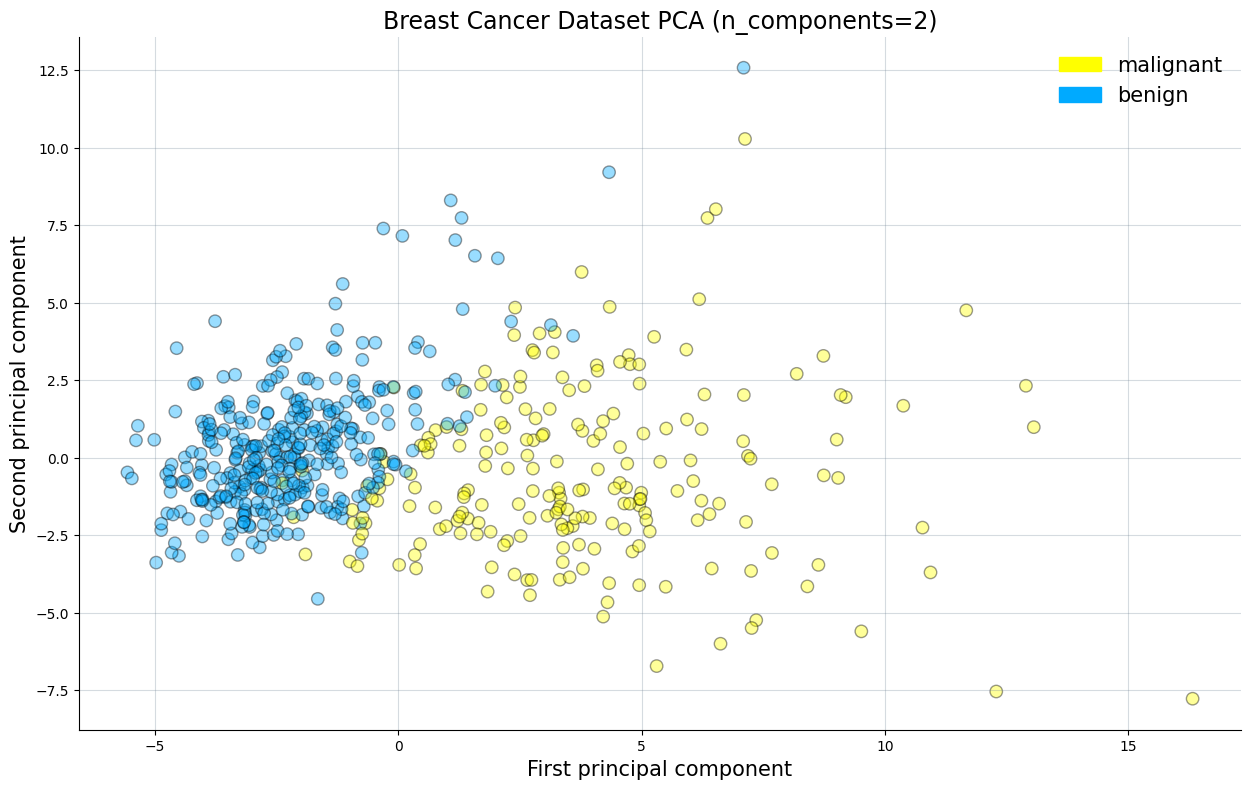

In [4]:
plot_labelled_scatter(canc_pca,y_canc,['malignant','benign'],(15,9))

# Labelling
plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second principal component',fontsize=15)
plt.title('Breast Cancer Dataset PCA (n_components=2)',fontsize=17)
plt.show();



*    two target classes are easily seperable even by a simple logistic regression
*   not only easy to Interpret but also easy to Classify


## Using pca to get feature co-relation between initial 30 features

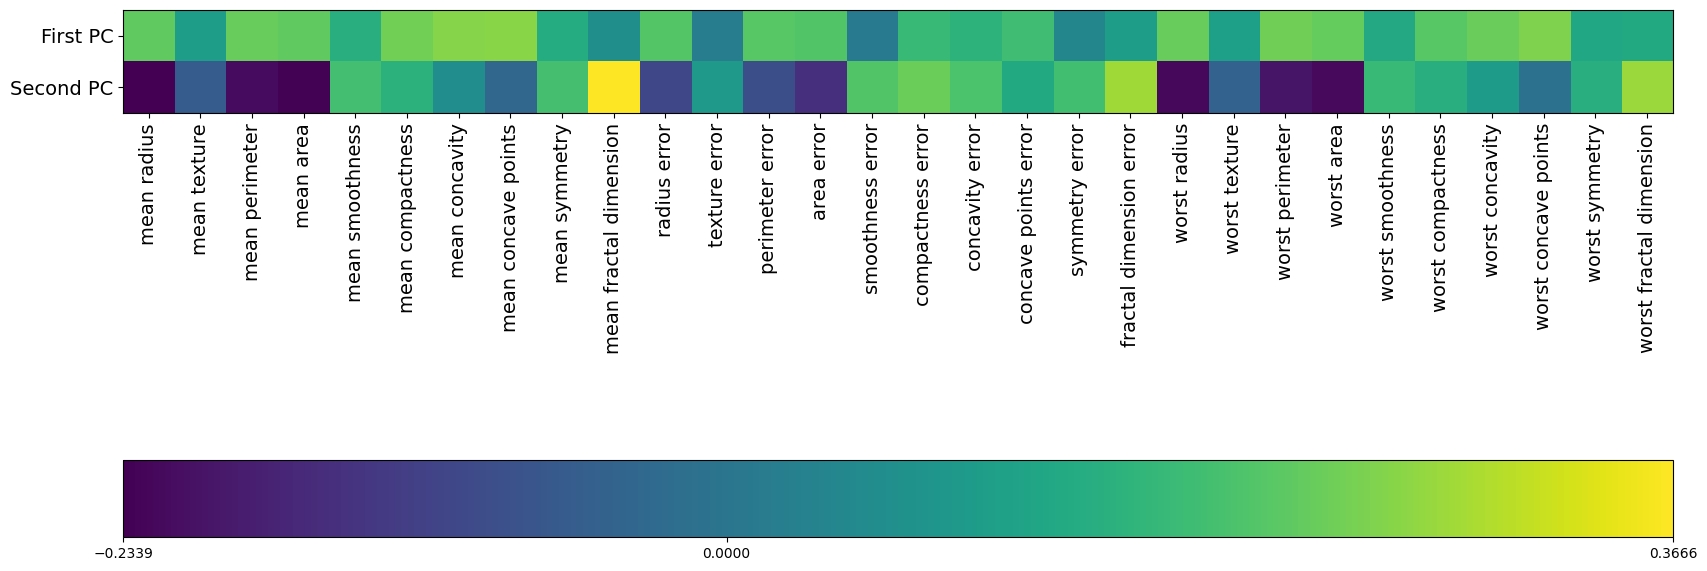

In [5]:
# .components_ -> stores co-relation between all high and low variance pair of feature

fig = plt.figure(figsize=(20,9))
plt.imshow(pca.components_,interpolation='none',cmap='viridis')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(len(feature_names)));
plt.gca().set_yticks(np.arange(2));
plt.gca().set_xticklabels(feature_names,rotation=90,fontsize=14);
plt.gca().set_yticklabels(['First PC','Second PC'],fontsize=14);

plt.colorbar(orientation='horizontal',ticks=[pca.components_.min(),0,pca.components_.max()],pad=0.5);
plt.show();


* **Interpreting the Principal Components**

    * **First Principal Component (PC1)**
        * All its values are **positive**.
        * **Indication:** Shows a **general correlation** between all 30 features.
        * **Meaning:** The features tend to **vary up and down together**.

    * **Second Principal Component (PC2)**
        * Has a **mixture of positive and negative signs**.
        * **Key Feature:** Contains a cluster of **negatively signed features**.
        * **Indication:**
            * These negatively signed features **co-vary together**.
            * They vary in the **opposite direction** of the remaining (positive-signed) features.

    * **Validation of PC2**
        * Looking at the feature names confirms this grouping makes sense.
        * **Example 1:** "mean texture" and "worst texture" vary together.
        * **Example 2:** "mean radius" and "worst radius" vary together.

# MDS(Multi-Dimensional Scaling)

* **Manifold Learning Algorithms**
    * A family of **unsupervised** algorithms.
    * **Goal:** To find low-dimensional structure hidden within high-dimensional data.
    * **Primary Use:** Very useful for visualizations.

* **Classic Example: The 'Swiss Roll Dataset'**
        * The data exists in **three dimensions**.
        * However, all points actually lie on a two-dimensional sheet that has a complex, rolled-up shape (this sheet is the manifold).

* **Comparison to PCA**
    * **PCA** is **not** sophisticated enough to find this type of complex, non-linear structure.

* **Example of a Manifold Learning Method**
    * Multi-dimensional scaling (MDS).

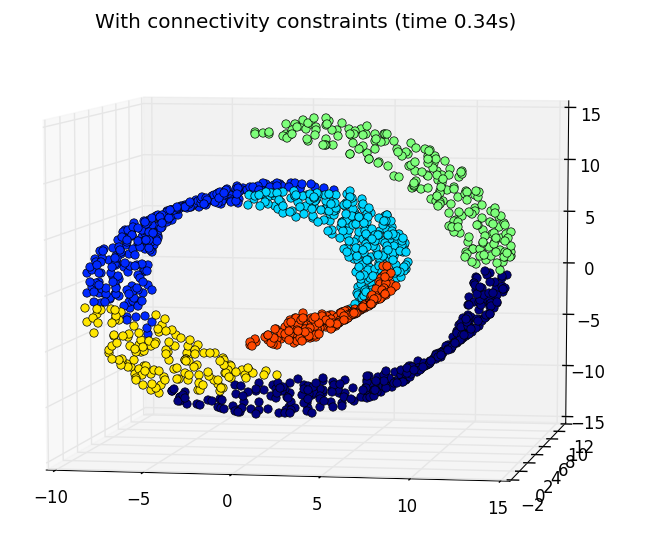

## Using mds on breast cancer dataset

Number of Features in Breat Cancer DataSet Before MDS : 30

Number of Features in Breast Cancer DataSet After MDS : 2


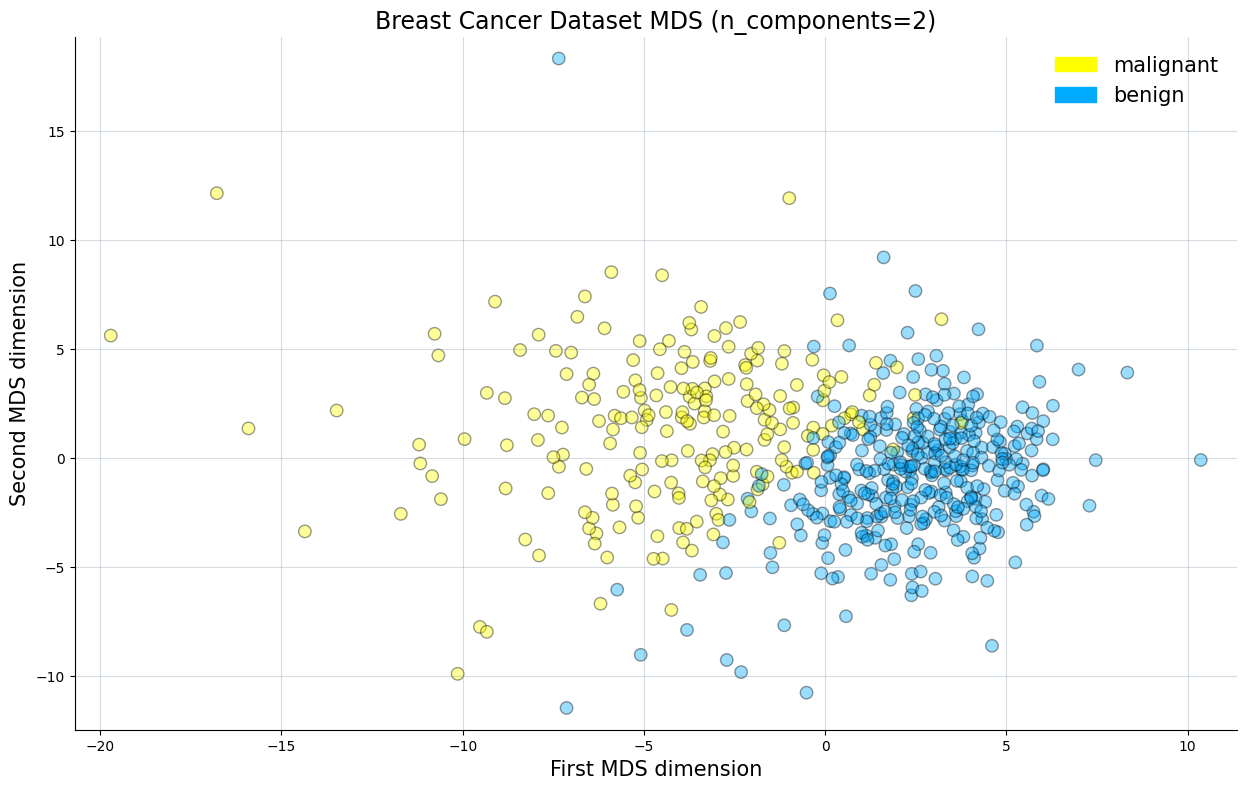

In [6]:
from sklearn.manifold import MDS
mds = MDS(n_components=2,random_state=2)
canc_mds = mds.fit_transform(canc_norm)
print('Number of Features in Breat Cancer DataSet Before MDS : {}\n\nNumber of Features in Breast Cancer DataSet After MDS : {}'
      .format(X_canc.shape[1],canc_mds.shape[1]))
plot_labelled_scatter(canc_mds,y_canc,['malignant','benign'],(15,9))
plt.xlabel('First MDS dimension',fontsize=15)
plt.ylabel('Second MDS dimension',fontsize=15)
plt.title('Breast Cancer Dataset MDS (n_components=2)',fontsize=17);
plt.show();


# t-SNE(T-distributed Stochastic Neighbor Embedding)

* **t-SNE (t-distributed Stochastic Neighbor Embedding)**
    * An **especially powerful** manifold learning algorithm.
    * **Primary Use:** Visualizing data.
* **Core Function:**
    * Finds a **two-dimensional representation** of data.
    * **Goal:** To make distances between points in the 2D scatterplot match the distances between those same points in the original high-dimensional dataset.
* **Key Characteristic:**
    * Gives **much more weight** to preserving distance information for points that are **neighbors**.

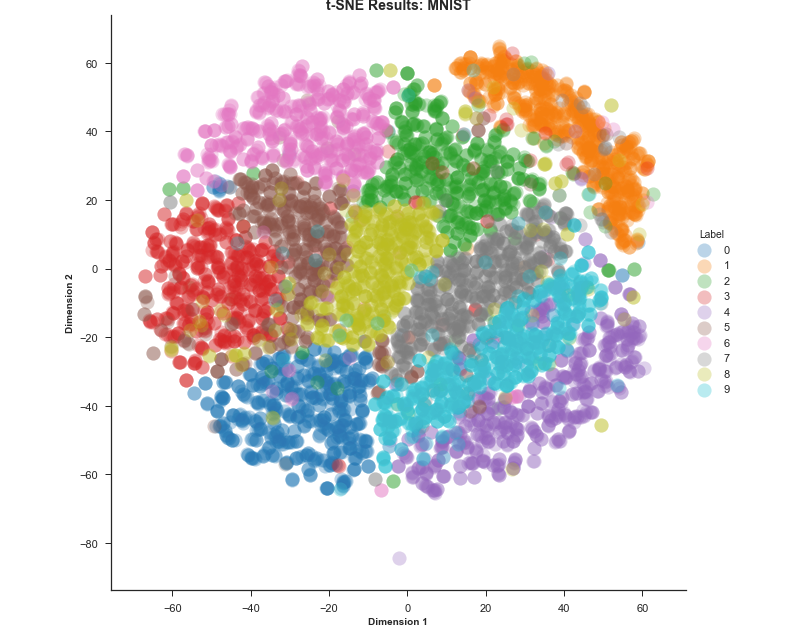

## Using t-SNE on breast cancer dataset

Number of Features in Breat Cancer DataSet Before T-SNE: 30

Number of Features in Breast Cancer DataSet After T-SNE : 2


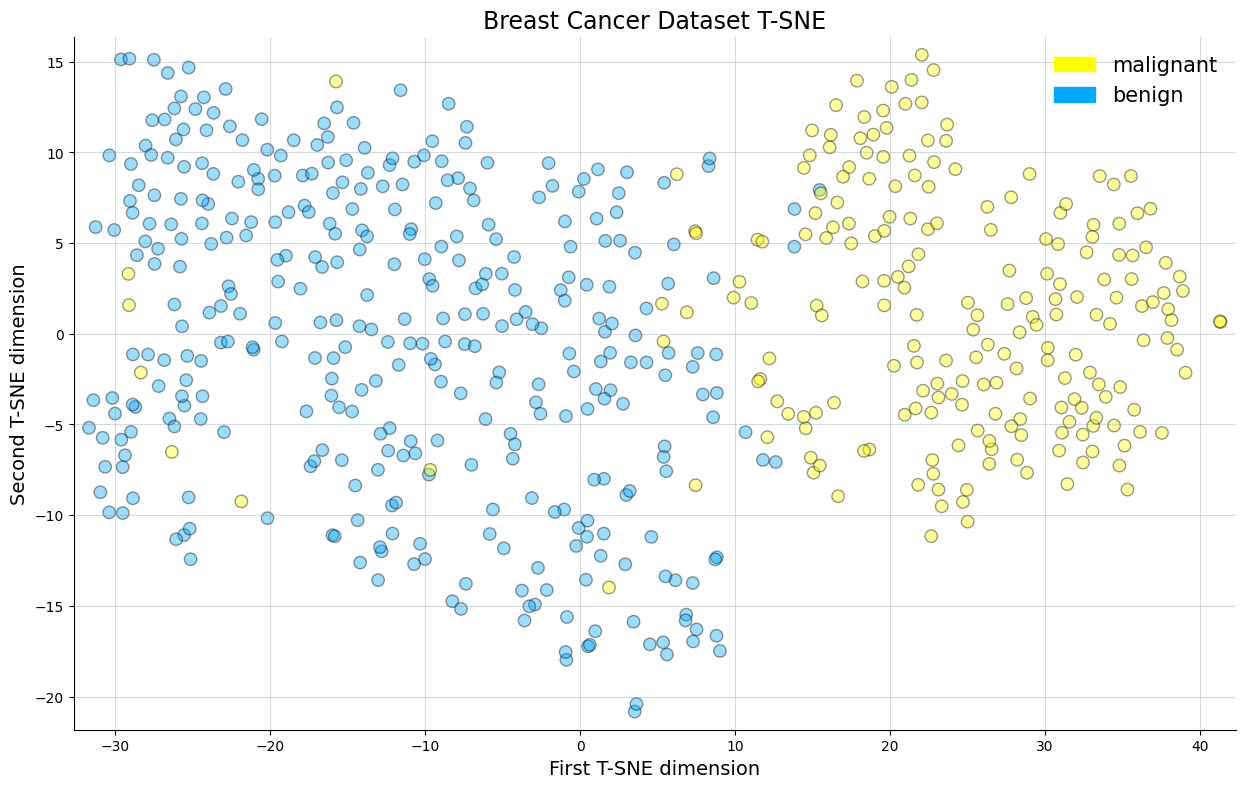

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=2)
canc_tsne = tsne.fit_transform(canc_norm)
print('Number of Features in Breat Cancer DataSet Before T-SNE: {}\n\nNumber of Features in Breast Cancer DataSet After T-SNE : {}'
      .format(X_canc.shape[1],canc_tsne.shape[1]))
plot_labelled_scatter(canc_tsne,y_canc,['malignant','benign'],(15,9))
plt.xlabel('First T-SNE dimension',fontsize=14)
plt.ylabel('Second T-SNE dimension',fontsize=14)
plt.title('Breast Cancer Dataset T-SNE',fontsize=17);
plt.show();